In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df_rnn = pd.read_csv("output_wfss_rnn.csv")
df_var = pd.read_csv("output_var.csv")
df_market_price = pd.read_csv("market_price.csv")
print(len(df_var))
print(len(df_rnn))
print(len(df_market_price))
print(df_var.head())
print(df_rnn.head())

2673
2673
2673
   VAR-Prediction
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
   RNN-Prediction
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN


In [4]:
var_mae = np.empty(2673)
var_mae[:] = 8.574107
var_mae
df_var_mae = pd.DataFrame(var_mae, columns = ['VAR_MAE'])

In [5]:
rnn_mae = np.empty(2673)
rnn_mae [:] = 5.40873695212
df_rnn_mae = pd.DataFrame(rnn_mae, columns = ['RNN_MAE'])


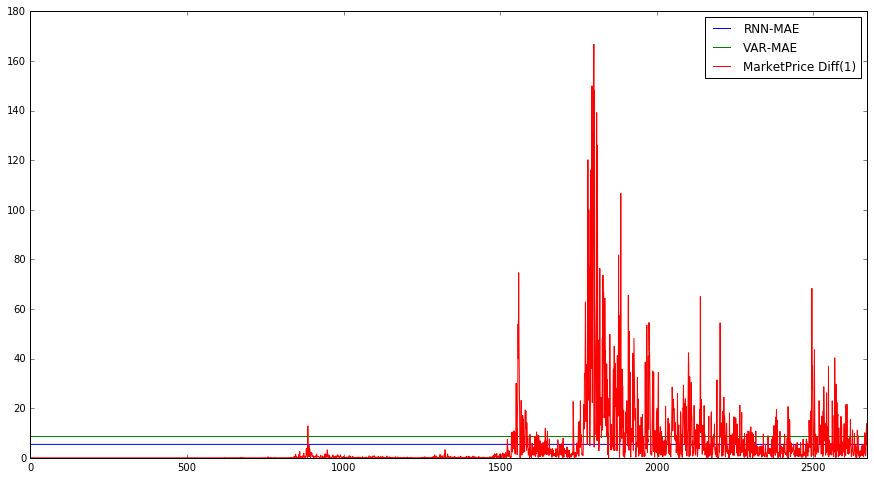

In [69]:
# Diff graph for MarketPrice.
# This plot shows the values for the two models MAE and the
# fluctuation of the BTC price from day to day.
df_diff = abs(df_market_price - df_market_price.shift(1))
df_diff.MarketPrice[0] = 0
df_diff.insert(loc = 0, column = 'VAR_MAE', value = df_var_mae.VAR_MAE)
df_diff.insert(loc = 0, column = 'RNN_MAE', value = df_rnn_mae.RNN_MAE)
df_diff.columns = ['RNN-MAE', 'VAR-MAE', 'MarketPrice Diff(1)']
df_diff.plot(figsize = (15,8))

In [68]:
df_diff.columns

Index([u'RNN_MAE', u'VAR_MAE', u'MarketPrice'], dtype='object')

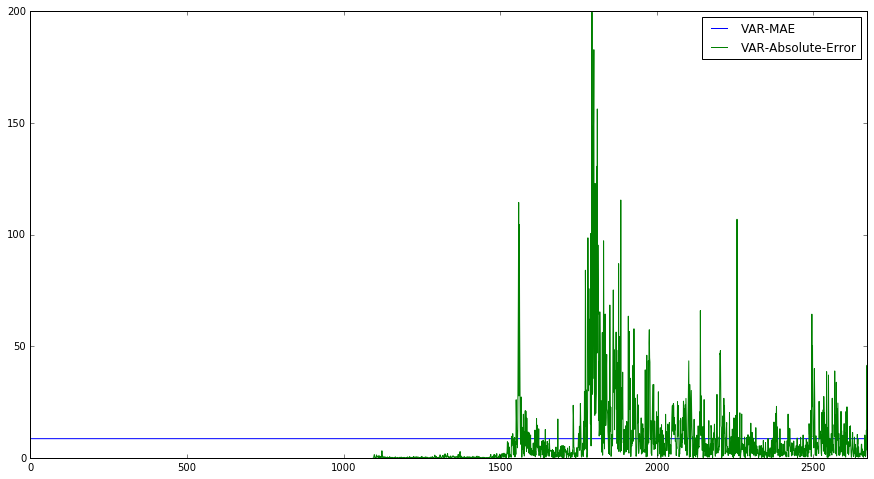

In [53]:
# VAR Error Visualization
df_error_var = pd.DataFrame(abs(df_market_price.MarketPrice - df_var['VAR-Prediction']))
df_error_var.insert(loc = 0, column = 'VAR-MAE', value = df_var_mae.VAR_MAE)
df_error_var.columns = ['VAR-MAE', 'VAR-Absolute-Error']
df_error_var.plot(figsize = (15,8))

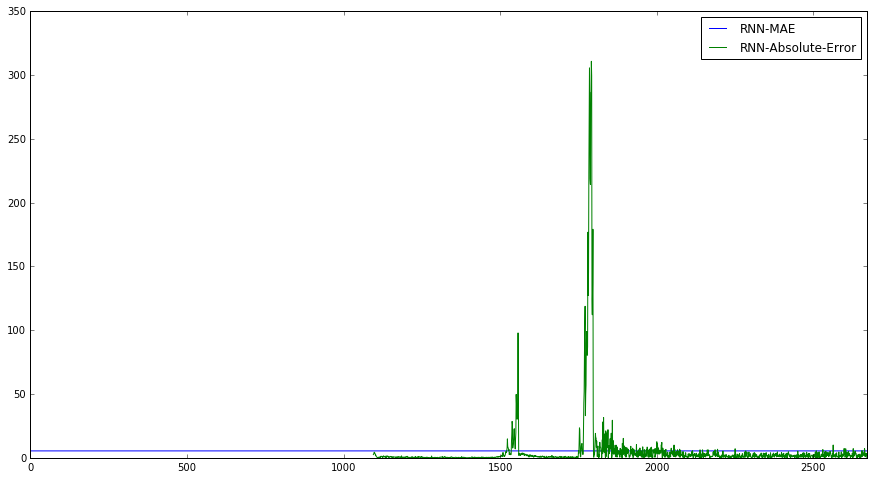

In [52]:
# RNN Error Visualization
df_error_rnn = pd.DataFrame(abs(df_market_price.MarketPrice - df_rnn['RNN-Prediction']))
df_error_rnn.insert(loc = 0, column = 'RNN-MAE', value = df_rnn_mae.RNN_MAE)
df_error_rnn.columns = ['RNN-MAE', 'RNN-Absolute-Error']
df_error_rnn.plot(figsize = (15,8))

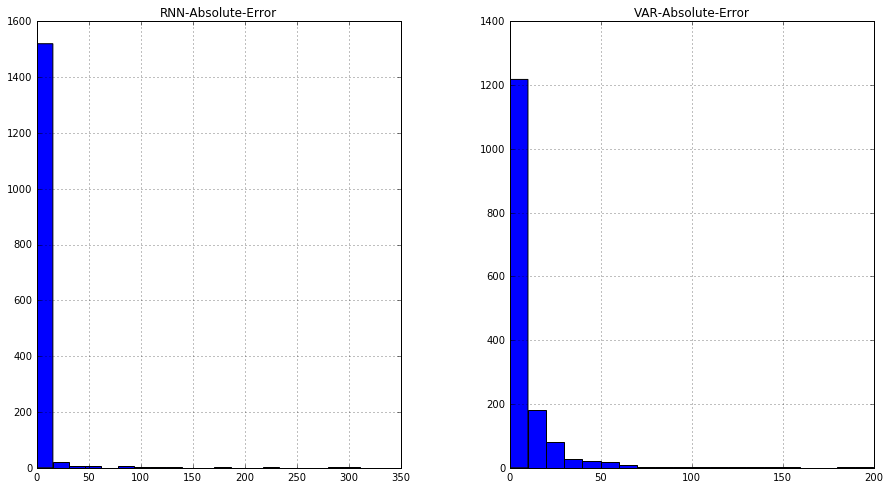

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1201229d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa11ffcc550>]], dtype=object)

In [59]:
# df_errors = df_error_var
# df_errors.insert(loc = 0, column = 'RNN-Absolute-Error', value = df_error_rnn['RNN-Absolute-Error'])
# df_errors.columns
df_errors[['RNN-Absolute-Error', 'VAR-Absolute-Error']].hist(figsize = (15, 8), bins = 20, stacked = True)

In [60]:
df_errors2 = df_errors
df_errors2[1095:].describe()

       RNN-Absolute-Error       VAR-MAE  VAR-Absolute-Error
count         1578.000000  1.578000e+03         1578.000000
mean             5.408737  8.574107e+00            8.574107
std             24.691927  2.381073e-13           17.160900
min              0.002354  8.574107e+00            0.000245
25%              0.410504  8.574107e+00            0.407024
50%              1.116599  8.574107e+00            2.847324
75%              2.955293  8.574107e+00            9.068503
max            310.874060  8.574107e+00          199.655239